In [ ]:
<img style="float: right;" src="" width="100%">

<img style="float: right;" src="QQ截图20180905124115.png" width="100%">

SVM 尝试寻找一个最优的决策边界

<img style="float: right;" src="QQ截图20180905124417.png" width="100%">

<img style="float: right;" src="QQ截图20180905124632.png" width="100%">


<img style="float: right;" src="QQ截图20180905130328.png" width="100%">

<img style="float: right;" src="QQ截图20180905130704.png" width="100%">

<img style="float: right;" src="QQ截图20180905130925.png" width="100%">

<img style="float: right;" src="QQ截图20180905131146.png" width="100%">

 - 替换符号
 - 目标是最大化d
<img style="float: right;" src="QQ截图20180905131227.png" width="100%">
<img style="float: right;" src="QQ截图20180905131351.png" width="100%">
<img style="float: right;" src="QQ截图20180905131542.png" width="100%">
<img style="float: right;" src="QQ截图20180905131621.png" width="100%">

 - Soft Margin SVM
 - 虚线和上界允许容忍分类错误

<img style="float: right;" src="QQ截图20180905194509.png" width="100%">

 - 正则化

<img style="float: right;" src="QQ截图20180905194816.png" width="100%">

# sklearn 中的SVM
- 实际使用svm
- 和KNN一样，要对数据进行标准化
- 涉及距离!如果在不同维度的的量纲不一样，会非常严重的影响SVM的决策边界

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

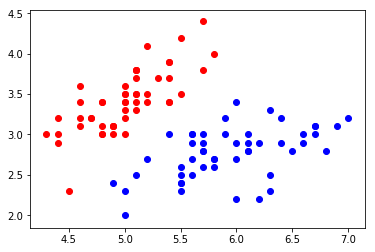

In [12]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [14]:
from sklearn.preprocessing import  StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [15]:
# 线性
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9) # sorf 里的 C,取值越大越hard
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
# 画模型
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


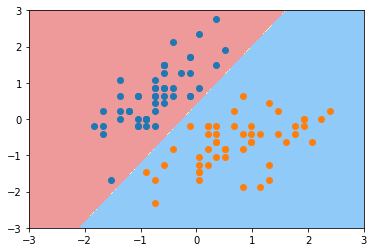

In [21]:
plot_decision_boundary(svc, axis=[-3,3,-3,3])
# 画数据
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [22]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


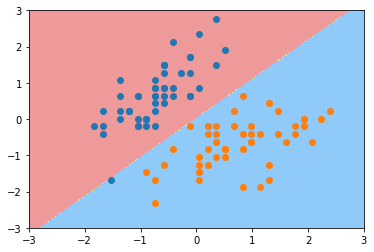

In [23]:
plot_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [24]:
svc.coef_

array([[ 4.03242923, -2.49295818]])

In [25]:
svc.intercept_

array([0.9536836])

In [26]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0 * x0 + w1 * x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y<=axis[3])
    down_index = (down_y >=axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


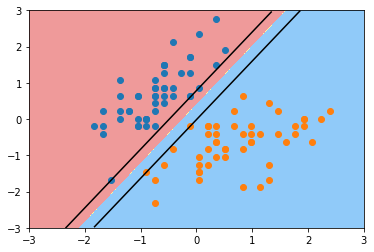

In [27]:
plot_svc_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [28]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y) #  penalty='l2'

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


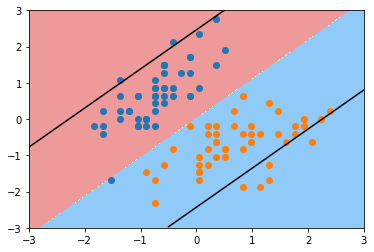

In [29]:
plot_svc_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

# SVM中使用多项式特征

In [30]:
from sklearn import datasets

X, y = datasets.make_moons()

In [31]:
X.shape

(100, 2)

In [32]:
y

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

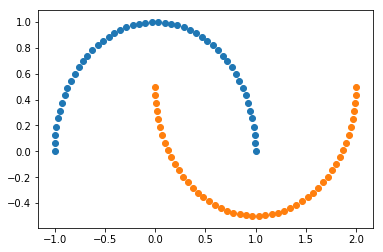

In [33]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

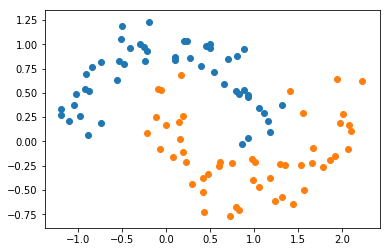

In [34]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 使用多项式特征的SVM

In [35]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),#生成多项式特征
        ("std_scaler", StandardScaler()),#标准化
        ("linearSVC", LinearSVC(C=C))#svm
    ])

In [36]:
poly_svc = PolynomialSVC(degree=3)

In [37]:
poly_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [38]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


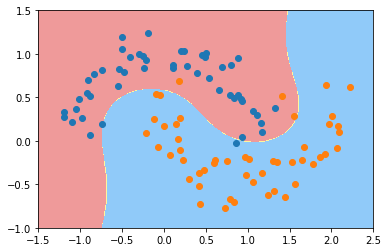

In [39]:
plot_decision_boundary(poly_svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 使用多项式核函数的SVM

In [40]:
from sklearn.svm import SVC

In [41]:
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler",StandardScaler()),
        ("kernelSVC",SVC(kernel="poly", degree=degree, C=C)) # 多项式特征poly
    ])   # 训练的过程不一样了

In [47]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


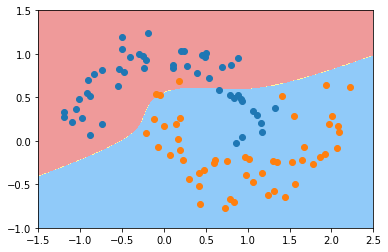

In [48]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [ ]:
<img style="float: right;" src="" width="100%">

# 什么是核函数

<img style="float: right;" src="QQ截图20180905205342.png" width="100%">

<img style="float: right;" src="QQ截图20180905205526.png" width="100%">

<img style="float: right;" src="QQ截图20180905205633.png" width="100%">

<img style="float: right;" src="QQ截图20180905205726.png" width="100%">
 - K

<img style="float: right;" src="QQ截图20180905210404.png" width="100%">

<img style="float: right;" src="QQ截图20180905210603.png" width="100%">

# 高斯核函数

<img style="float: right;" src="QQ截图20180905210820.png" width="100%">

In [ ]:
<img style="float: right;" src="QQ截图20180905210820.png" width="100%">

<img style="float: right;" src="QQ截图20180905211019.png" width="100%">

 - 将每一个样本点映射到一个无穷维的特征空间

<img style="float: right;" src="QQ截图20180905212244.png" width="100%">

- 原本是一维度的数据  加上一个y = x^2

<img style="float: right;" src="QQ截图20180905212404.png" width="100%">

# 直观理解高斯核函数

In [59]:
x = np.arange(-4,5,1)

In [60]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [63]:
y = np.array((x >= -2) & (x <= 2),dtype='int')

In [64]:
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

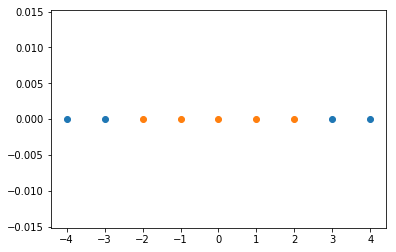

In [65]:
plt.scatter(x[y==0],[0]*len(x[y==0]))
plt.scatter(x[y==1],[0]*len(x[y==1]))
plt.show()

In [72]:
def gaussian(x,l):
    gamma = 1.0
    return np.exp(-gamma*(x-l)**2)

In [73]:
l1, l2 = -1, 1

X_new = np.empty((len(x),2))
for i, data in enumerate(x):
    X_new[i,0] = gaussian(data, l1)
    X_new[i,1] = gaussian(data, l2)

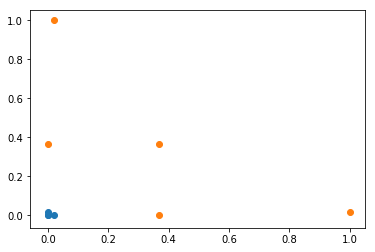

In [74]:
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()

<img style="float: right;" src="QQ截图20180905213433.png" width="100%">

<img style="float: right;" src="QQ截图20180905213604.png" width="100%">

- m<n 适用高斯核  例如自然语言处理

## scikit-learn 中的高斯核函数

In [ ]:
<img style="float: right;" src="QQ截图20180905210820.png" width="100%">

<img style="float: right;" src="QQ截图20180905214413.png" width="100%">

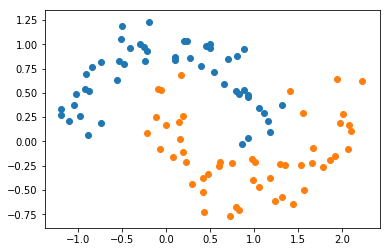

In [79]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])










plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [84]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [85]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


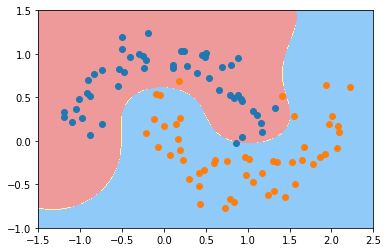

In [87]:
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [88]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


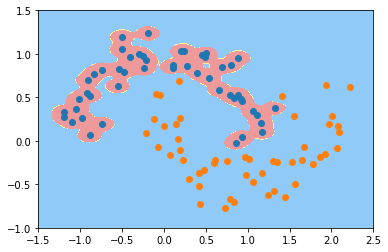

In [89]:
plot_decision_boundary(svc_gamma100,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [90]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


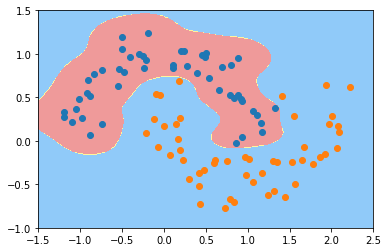

In [91]:
plot_decision_boundary(svc_gamma10,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [92]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


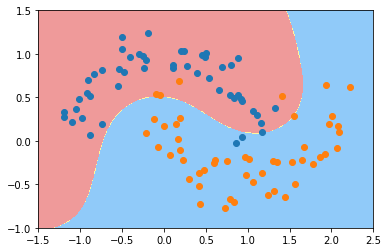

In [93]:
plot_decision_boundary(svc_gamma05,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# SVM思路决解回归问题

<img style="float: right;" src="QQ截图20180905220446.png" width="100%">

In [95]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [97]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  Pipeline

def StandardScalerSVR(epsilon=0.1):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linearSVR", LinearSVR(epsilon=epsilon))
    ])

In [98]:
svr = StandardScalerSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [99]:
svr.score(X_test,y_test)

0.6355436097145435